In [1]:
from amadeusgpt.main import AMADEUS
from amadeusgpt.config import Config
import amadeusgpt
from pathlib import Path

In [2]:
amadeus_root = Path(amadeusgpt.__file__).parent.parent
config = Config( amadeus_root / "amadeusgpt/configs/Horse_template.yaml")
config['video_info']['video_file_path'] = str(amadeus_root / config['video_info']['video_file_path'])
config['keypoint_info']['keypoint_file_path'] = None #str(amadeus_root / config['keypoint_info']['keypoint_file_path'])
print (config)
amadeus = AMADEUS(config)


keypoint_info:
  body_orientation_keypoints:
    animal_center: neck
    neck: nose
    tail_base: tail base
  head_orientation_keypoints:
    neck: neck
    nose: nose
  keypoint_file_path: null
  model_checkpoint: ''
  model_name: ''
llm_info:
  keep_last_n_messages: 2
object_info:
  load_objects_from_disk: false
video_info:
  scene_frame_number: 100
  video_file_path: /mnt/md0/shaokai/AmadeusGPT-dev/examples/Horse/BrownHorseinShadow.mp4



INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


current total cost 0.0 $
current total tokens 540
The image shows a person walking a horse on a dirt path. The background includes trees, a large tent-like structure, and other buildings or structures. The scene appears to be outdoors, possibly at a park or a fairground.

Here is the JSON string based on the description:

```json
{
    "description": "A person walking a horse on a dirt path with trees, a tent-like structure, and other buildings in the background.",
    "individuals": 1,
    "species": "sideview_quadruped",
    "background_objects": ["trees", "tent-like structure", "buildings"]
}
```


In [3]:
from IPython.display import Markdown, display
def parse_result(amadeus, qa_message):
    display(Markdown(qa_message['chain_of_thought']))
    sandbox = amadeus.sandbox
    qa_message = sandbox.code_execution(qa_message)
    sandbox.render_qa_message(qa_message)
    print ('after executing the function')
    display(qa_message['meta_info'])
    display(Markdown(str(qa_message['function_rets'])))

HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


current total cost 0.04 $
current total tokens 6544


To plot the gait analysis results using the specified keypoints (`front_left_thai` and `front_left_knee`), we need to follow these steps:

1. Run the gait analysis using the provided keypoints.
2. Plot the results of the gait analysis.

We can achieve this using the `run_gait_analysis` and `plot_gait_analysis_results` functions from the `AnimalBehaviorAnalysis` class.

Here is the code to accomplish this:

```python
def plot_gait_analysis_results(config: Config):
    '''
    Parameters:
    ----------
    config: Config
    '''
    # create_analysis returns an instance of AnimalBehaviorAnalysis
    analysis = create_analysis(config)
    
    # Define the limb keypoints
    limb_keypoints = ["front_left_thai", "front_left_knee"]
    
    # Run gait analysis
    gait_analysis_results = analysis.run_gait_analysis(limb_keypoint_names=limb_keypoints)
    
    # Plot the gait analysis results
    figure, axs = analysis.plot_gait_analysis_results(gait_analysis_results=gait_analysis_results, 
                                                      limb_keypoints=limb_keypoints, 
                                                      color_stance="plum")
    return figure, axs
```

This function will:
1. Create an instance of `AnimalBehaviorAnalysis`.
2. Define the limb keypoints as specified.
3. Run the gait analysis using these keypoints.
4. Plot the results of the gait analysis and return the figure and axes objects for further manipulation or display.

after executing the function


{'description': 'A person walking a horse on a dirt path with trees, a tent-like structure, and other buildings in the background.',
 'individuals': 1,
 'species': 'sideview_quadruped',
 'background_objects': ['trees', 'tent-like structure', 'buildings']}

(<Figure size 800x800 with 1 Axes>, <Axes: ylabel='Limb'>)

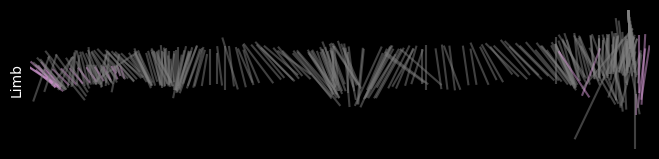

In [5]:
query = "Plot me the gait analysis results. The limb is defined with the following keypoints: front_left_thai, front_left_knee"
qa_message = amadeus.step(query)
parse_result(amadeus, qa_message)